<a href="https://colab.research.google.com/github/gnovack/keras-preprocessing/blob/master/colab/CenterCrop_Layer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Summary

This notebook demonstrates the `CenterCrop` preprocessing layer. This layer is used to crop input images to a specified size. You can find the official reference documentation for this layer here: [tf.keras.layers.experimental.preprocessing.CenterCrop](https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/preprocessing/CenterCrop) 

In [0]:
import os, urllib.request
from urllib.error import HTTPError

import matplotlib.pyplot as plt
import tensorflow as tf

## Download Sample Images
 First off, we'll need some images to play with. We'll download 99 images of elephants from the GitHub repo. These images were sourced from the [Animals-10](https://www.kaggle.com/alessiocorrado99/animals10) dataset on Kaggle, and resized to 640x500

In [7]:
try:  
    os.makedirs('data/image/elephant')  
except OSError as error:  
    print(error) 

try:
  for i in range(1,100):
    url = f'https://raw.githubusercontent.com/gnovack/keras-preprocessing/master/data/image/elephant/elephant_{i}.png'
    print('\r', f'Downloading image {i} of 99...', end='')
    urllib.request.urlretrieve(url, f'data/image/elephant/elephant_{i}.png')
except HTTPError as error:
  print(f'An error occurred downloading images: {error}')

print(f'Downloaded {i} images!')

In [0]:
BATCH_SIZE = 32
CROP_HEIGHT = 250
CROP_WIDTH = 250

## Create the ImageDataGenerator
The `ImageDataGenerator` class is used to load images from the directory where we stored the sample elephant images.

In [21]:
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
data_generator = image_generator.flow_from_directory(directory=str('data/image'),
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(500,640))

Found 99 images belonging to 1 classes.


## Create & Execute the Model
Here we're just creating a model with a single `CenterCrop` layer, then passing in the Data Generator in order to center crop the sample images down to 250x250

In [0]:
center_crop_layer = tf.keras.layers.experimental.preprocessing.CenterCrop(CROP_HEIGHT,CROP_WIDTH)
model = tf.keras.models.Sequential([center_crop_layer])

uncropped_batch, _ = next(data_generator)
cropped_images = model.predict(data_generator)

## Vizualize the cropped images

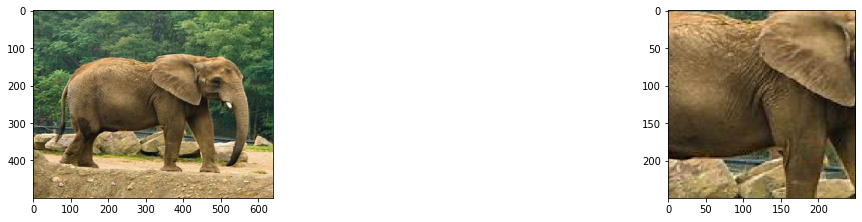

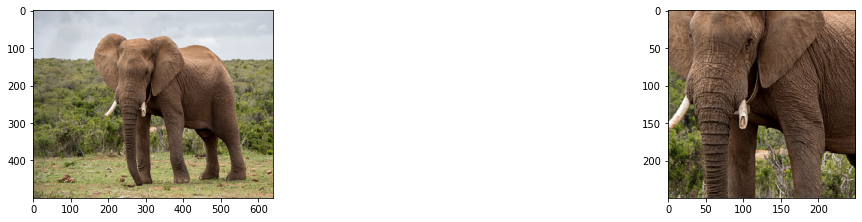

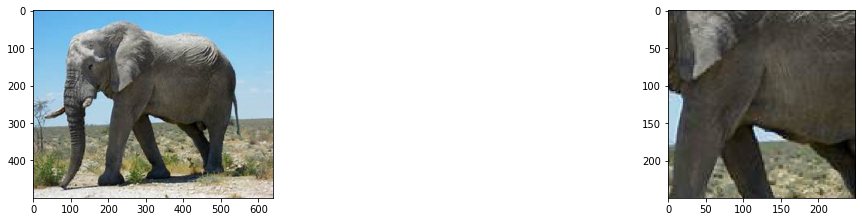

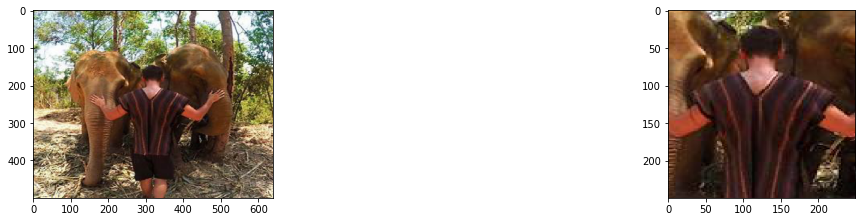

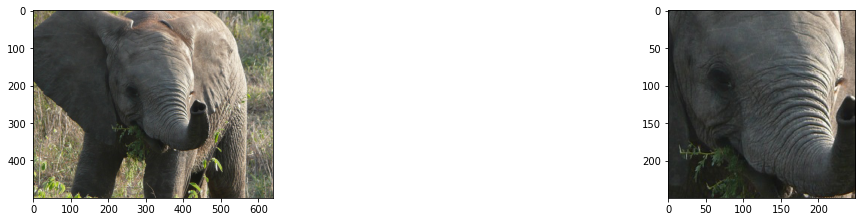

In [23]:
for i in range(0,10,2):
    plt.figure(figsize=(20,20))
    plt.subplot(5,2,i+1)
    plt.imshow(uncropped_batch[i])
    plt.subplot(5,2,i+2)
    plt.imshow(cropped_images[i])

plt.show()